<a href="https://colab.research.google.com/github/blackm4mba/Spoon-Knife/blob/main/Introduction_au_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Masterclass - Introduction au Machine Learning

## 1. Premier jeu de données: les blobs

> Le jeu de données qui nous intéresse ici contient deux variables explicatives, appelées `feature1` et `feature2`. Nous avons une variable cible appelée `target`. La variable `target` contient uniquement des 0 et des 1, signifiant que l'observation appartient au groupe 0 ou au groupe 1.

* (a) De quel type de problème s'agit-il ?


> Notre jeu de données a des données générées de manière aléatoire. 

* (b) Exécutez la cellule suivante pour générer les données

In [ ]:
import pandas as pd
import numpy as np

size = 2000

x = np.concatenate([
    np.random.normal(loc=5, scale=1, size=200),
    np.random.normal(loc=10, scale=1, size=200)
])
y = np.concatenate([
    np.random.normal(loc=5, scale=1, size=200),
    np.random.normal(loc=10, scale=1, size=200)
])

target = np.concatenate([
    np.ones(shape=200),
    np.zeros(shape=200)
])

df = pd.DataFrame(
    {
        'feature1':x,
        'feature2': y,
        'target': target
    }
)

df["target"] = df["target"].astype(int)

df.head()

,feature1,feature2,target
0,5.184594,5.276166,1
1,4.568951,4.933763,1
2,4.043895,6.302859,1
3,6.079949,3.999698,1
4,5.330505,4.301977,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  400 non-null    float64
 1   feature2  400 non-null    float64
 2   target    400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


> Une bonne pratique consiste à afficher les valeurs manquantes ainsi que la distribution des données.

* (c) Affichez les valeurs manquantes ainsi que la distribution des données

In [ ]:
print(df.isna().sum())
print(df.isna())
df.describe()

feature1    0
feature2    0
target      0
dtype: int64
     feature1  feature2  target
0       False     False   False
1       False     False   False
2       False     False   False
3       False     False   False
4       False     False   False
..        ...       ...     ...
395     False     False   False
396     False     False   False
397     False     False   False
398     False     False   False
399     False     False   False

[400 rows x 3 columns]


,feature1,feature2,target
count,400.000000,400.000000,400.000000
mean,7.485711,7.542954,0.500000
std,2.668076,2.706015,0.500626
min,2.485055,2.468007,0.000000
25%,5.064409,5.069217,0.000000
50%,7.175360,7.476675,0.500000
75%,10.025733,9.965552,1.000000
max,12.972592,13.098665,1.000000


> Une autre façon de prendre en main le jeu de données est d'afficher des histogrammes pour mieux comprendre la distribution des données. 

* (d) Exécuter la cellule suivante

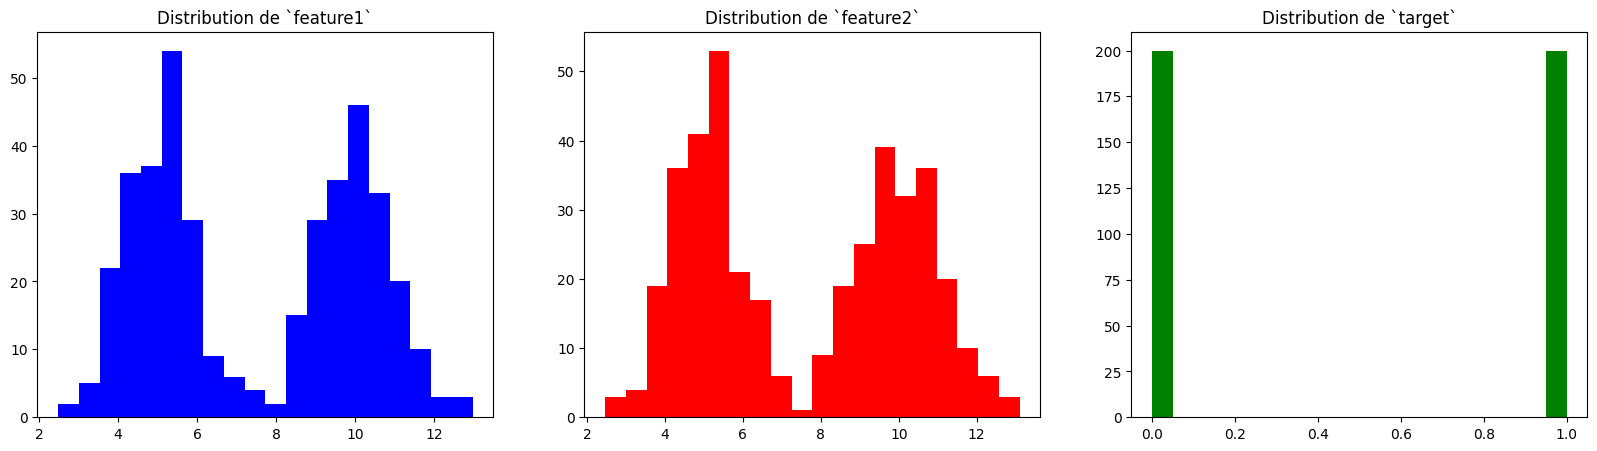

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].hist(df['feature1'], color='b', bins=20)
axes[0].set_title('Distribution de `feature1`')
axes[1].hist(df['feature2'], color='r', bins=20)
axes[1].set_title('Distribution de `feature2`')
axes[2].hist(df['target'], color='g', bins=20)
axes[2].set_title('Distribution de `target`')

plt.show()

> Dans ce cas particulier, on peut représenter les trois variables sur un même graphique.

* (c) Exécuter la cellule suivante

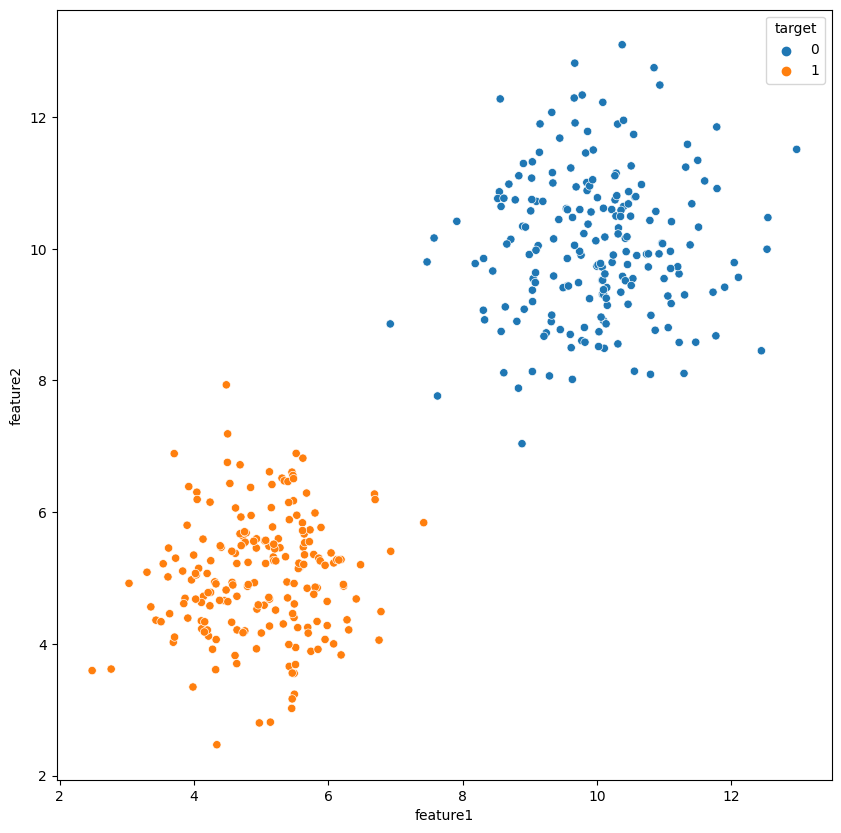

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='feature1', y='feature2', data=df, hue='target')
plt.show()

> Pour rappel, notre but est ici de trouver une règle qui permet de décider si une donnée en entrée appartient à l'une ou l'autre des classes.

* (c) Proposez une fonction qui permet de prédire la classe des observations

In [ ]:
def predict(feature_1, feature_2):
  return ((feature_1 < 8) & (feature_2 < 8)) * 1

In [ ]:
df.head()

,feature1,feature2,target
0,5.184594,5.276166,1
1,4.568951,4.933763,1
2,4.043895,6.302859,1
3,6.079949,3.999698,1
4,5.330505,4.301977,1


In [ ]:
predictions = predict(df.feature1, df.feature2)

predictions

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

> On peut à présent comparer les prédictions avec les résultats avec une matrice de confusion.

* (d) Exécutez la cellule suivante

In [ ]:
df['prediction'] = predict(df['feature1'], df['feature2'])

pd.crosstab(df['prediction'], df['target'])

target,0,1
prediction,,
0,199,0
1,1,200


> On va aussi afficher les prédictions sur un graphique.

* (e) Exécutez la cellule suivante


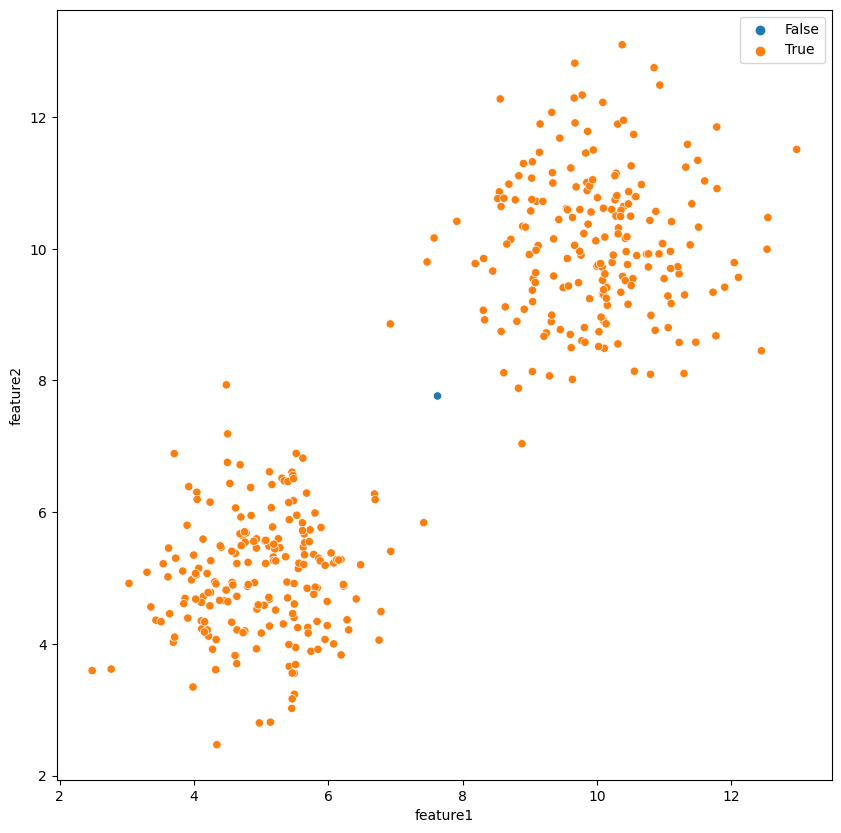

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='feature1', y='feature2', data=df, hue=df['target']==df['prediction'])
plt.show()

* (f) Calculez la précision de l'algorithme

In [ ]:
sum(df['prediction'] == df['target']) / len(df)

from sklearn.metrics import accuracy_score

accuracy_score(df['target'], df['prediction'])

0.9975

## 2. Deuxième jeu de données: les lunes

> Ce deuxième jeu de données est plus complexe.

* (a) Exécutez cette cellule pour générer les données

In [ ]:
from sklearn.datasets import make_biclusters, make_moons

data = make_moons(n_samples=400, noise=.2)
print(data)
x = data[0][:, 0]
y = data[0][:, 1]
target = data[1]

df = pd.DataFrame(
    {
        'feature1': x,
        'feature2': y,
        'target': target
    }
)

df['target'] = df['target'].astype(int)

df.head()

(array([[ 1.46097414e+00,  1.83522580e-01],
       [-5.00749559e-01,  4.01107996e-01],
       [-3.97510716e-01,  1.23252140e+00],
       [-1.03351393e+00,  7.20678914e-01],
       [ 1.05531804e+00,  2.69481248e-01],
       [ 1.85817522e+00,  6.00258348e-01],
       [ 1.11925578e+00, -3.24347903e-01],
       [ 1.57215545e+00, -2.98164513e-01],
       [-5.59583866e-01,  8.17887376e-01],
       [ 4.46082479e-01, -8.65827729e-02],
       [ 7.60941439e-01,  3.72499490e-01],
       [-1.58561267e-01,  3.35204630e-01],
       [ 8.39688368e-01,  8.06109308e-01],
       [ 1.24613382e+00, -3.89351820e-01],
       [-5.70651244e-01,  1.09884935e+00],
       [ 6.82954197e-01, -6.48457755e-01],
       [-8.78710201e-01,  4.29937351e-01],
       [ 1.78103768e+00,  2.32036156e-01],
       [-1.39418881e-01,  1.04144132e+00],
       [-1.25811527e+00,  5.92485931e-01],
       [ 2.12154246e+00, -1.31536223e-01],
       [-3.99460424e-01,  9.10784622e-01],
       [ 5.13789425e-01,  1.71318973e-01],
       [-9

,feature1,feature2,target
0,1.460974,0.183523,0
1,-0.500750,0.401108,0
2,-0.397511,1.232521,0
3,-1.033514,0.720679,0
4,1.055318,0.269481,0


> Nous allons essayer de reproduire les mêmes étapes que dans la première partie.

* (b) Reproduisez les étapes de la partie précédente

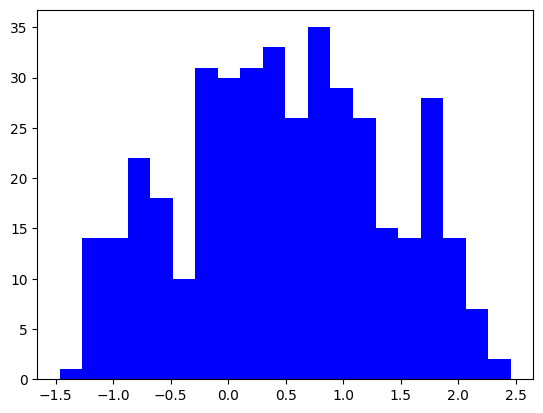

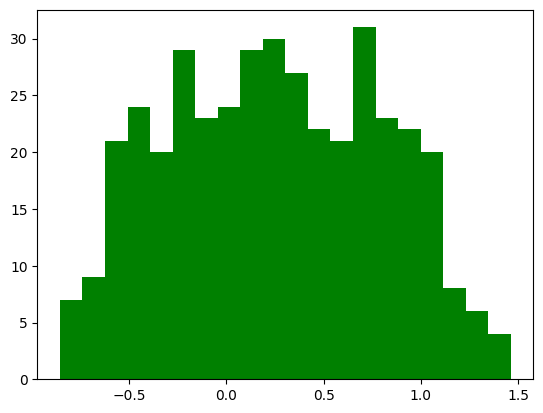

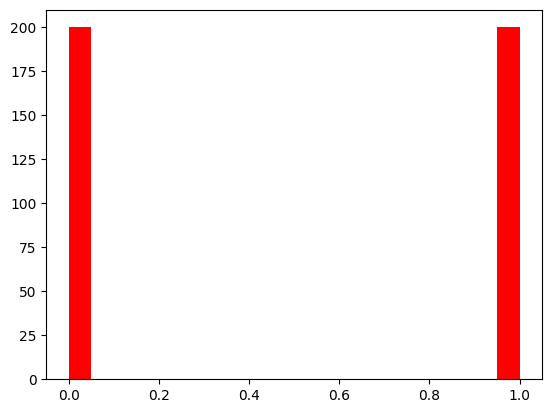

In [ ]:
# Reproduire les étapes précédentes

plt.hist(df['feature1'], bins=20, color='b')
plt.show()

plt.hist(df['feature2'], bins=20, color='g')
plt.show()

plt.hist(df['target'], bins=20, color='r')
plt.show()




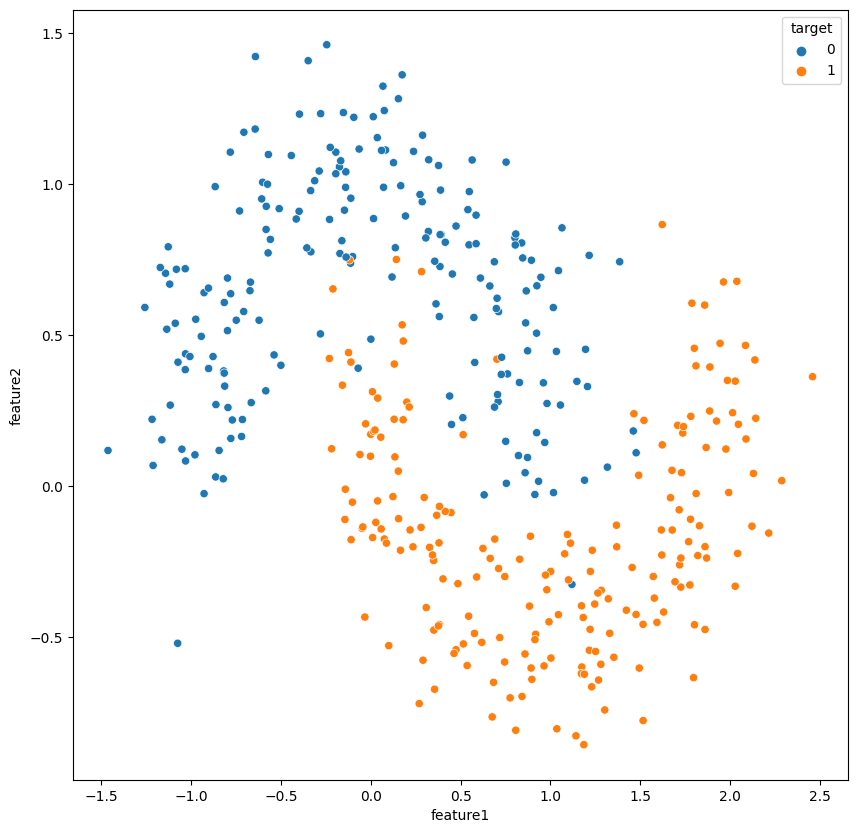

In [ ]:
plt.figure(figsize=(10, 10))
# plt.scatter(df['feature1'], df['feature2'], c=df['target'])
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df)

plt.show()

In [ ]:
pred = ((df.feature1 > 0 ) & (df.feature2 < 0.5)) * 1

accuracy_score(df['target'], pred)

0.845

> On remarque que la fonction de décision semble difficile à prendre en compte. Pour arriver à trouver une fonction de décision facilement, on peut utiliser un modèle de Machine Learning. Dans la cellule suivante, on instancie 3 modèles de Machine Learning. On peut les entraîner en utilisant la méthode `fit` et on peut obtenir des prédictions en utilisant la méthode `predict`.

* (c) Exécutez la prochaine cellule pour créer ces modèles et appliquez les au jeu de données

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


modele1 = LogisticRegression()
modele2 = DecisionTreeClassifier()
modele3 = SVC()
modele4 = KNeighborsClassifier()


modele1.fit(df[['feature1', 'feature2']], df['target'])
modele2.fit(df[['feature1', 'feature2']], df['target'])
modele3.fit(df[['feature1', 'feature2']], df['target'])
modele4.fit(df[['feature1', 'feature2']], df['target'])




KNeighborsClassifier()

In [ ]:
accuracy_score(df['target'], modele1.predict(df[['feature1', 'feature2']]))

0.86

In [ ]:
accuracy_score(df['target'], modele2.predict(df[['feature1', 'feature2']]))

1.0

In [ ]:
accuracy_score(df['target'], modele3.predict(df[['feature1', 'feature2']]))

0.96

In [ ]:
accuracy_score(df['target'], modele4.predict(df[['feature1', 'feature2']]))

0.9625

In [ ]:
data = make_moons(n_samples=2000, noise=.3)
x = data[0][:, 0]
y = data[0][:, 1]
target = data[1]

new_df = pd.DataFrame(
    {
        'feature1': x,
        'feature2': y,
        'target': target
     
    }
)



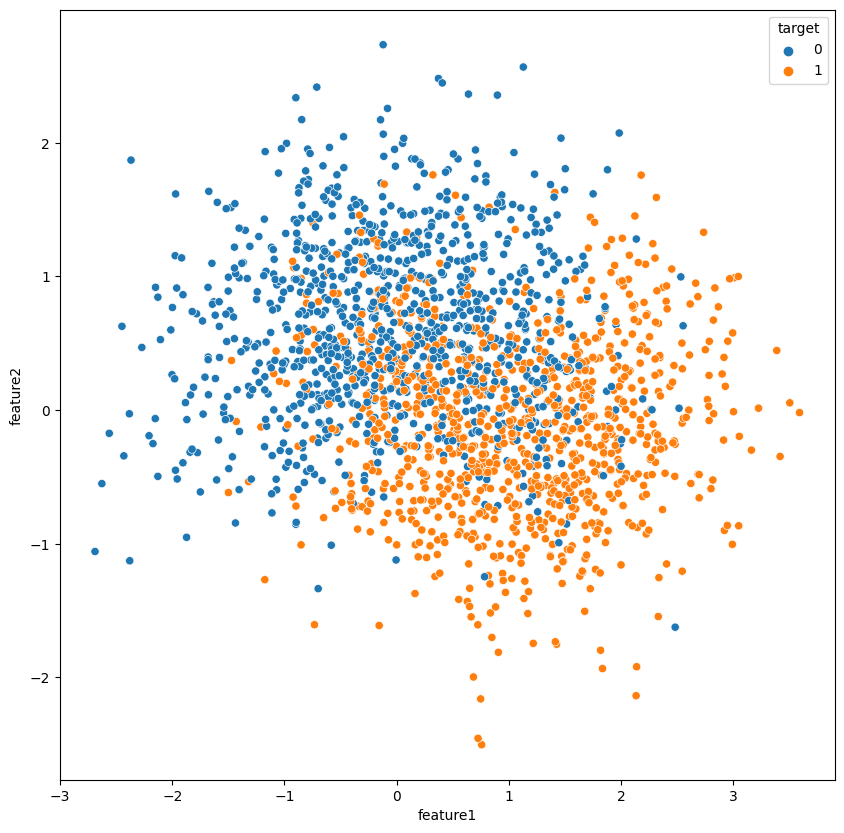

In [ ]:
plt.figure(figsize=(10, 10))
# plt.scatter(df['feature1'], df['feature2'], c=df['target'])
sns.scatterplot(x='feature1', y='feature2', hue='target', data=new_df)

plt.show()

In [ ]:
accuracy_score(modele1.predict(new_df[['feature1', 'feature2']]), new_df['target'])


0.773

In [ ]:
accuracy_score(modele2.predict(new_df[['feature1', 'feature2']]), new_df['target'])


0.788

In [ ]:
accuracy_score(modele3.predict(new_df[['feature1', 'feature2']]), new_df['target'])


0.793

In [ ]:
accuracy_score(modele4.predict(new_df[['feature1', 'feature2']]), new_df['target'])


0.783

## 4. Mise en situation sur un petit projet de Machine Learning
> Le jeu de données que nous allons utiliser recense diverses caractéristiques de pingouins.  
L'objectif sera, à partir de ces caractéristiques, de classifier les pingouins par espèce. 
>
> Le dataset est assez simple, et ne comporte que 7 colonnes, pour environ 400 lignes.   
> Les variables sont les suivantes :
>
>*   `species` l'espèce du pingouin (Chinstrap, Adélie, or Gentoo)
>
>
>* `culmen_length_m`: longueur du culmen (mm)
>
>
>* `culmen_depth_mm`: profondeur du culmen(mm)
>
>
>* `flipper_length_mm`: longueur de la nageoire (mm)
>
>
>* `body_mass_g`: masse  (g)
>
>
>* `island`: nom de l'île  (Dream, Torgersen, or Biscoe) de recensement
>
>
>* `sex`: sexe du pingouin
>
>
* (a) Exécuter la cellule suivante pour charger les données et afficher les premières lignes.

In [ ]:
df = pd.read_csv('https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/resources/datasets/penguins_size.csv')

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


> Dès les premières lignes on se rend compte que le jeu de données comportent des valeurs manquantes. 
>
>
* (b) Exécuter la cellule suivante pour recenser le nombre de valeurs manquantes par colonne.

In [ ]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

> Mise à part la variable `sex`, les autres variables présentant des valeurs manquantes sont numériques.  
> On procèdera en deux temps.  
>
>
* (c) Remplacer les valeurs manquantes de la variable `sex` par son mode.
* (d) Remplacer le reste des valeurs manquantes par les moyennes des variables correspondantes.

In [ ]:

df['sex']=df['sex'].fillna(df['sex'].mode()[0])

print(df['sex'].value_counts())

df=df.fillna(df.mean())


MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64


<ipython-input-45-359588ae3cfe>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [ ]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

> Maintenant que nous nous sommes débarassés des valeurs manquantes, essayons de visualiser les données avec lesquelles nous allons travailler.  
>
>
* (e) Afficher la distribution des données.
* (f) Afficher la distribution de la variable cible `species`.

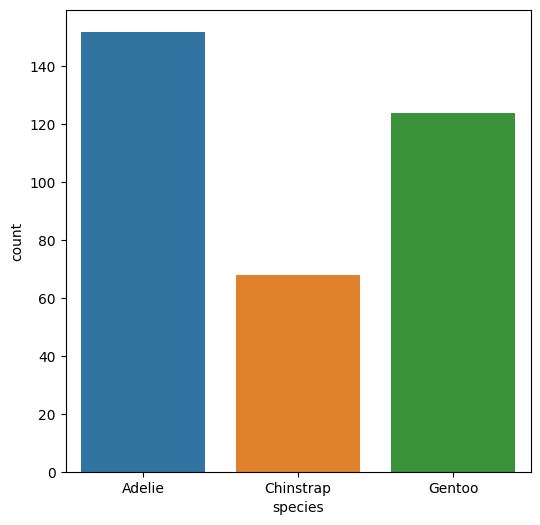

In [ ]:
#df.describe()
plt.figure(figsize=(6,6))
sns.countplot(x = df['species'])
plt.show();

> Il peut être intéressant également d'observer les répartitions de données pour voir si l'on repère des schémas utiles à la modélisation. 
>
>
* (g) Dans différents scatterplots, afficher les variables de votre choix en fonction de la longueur ou la profondeur du culmen. Colorer les points en fonction de l'espèce. 

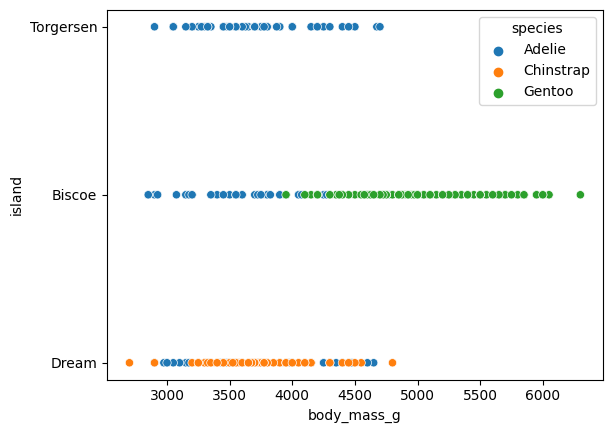

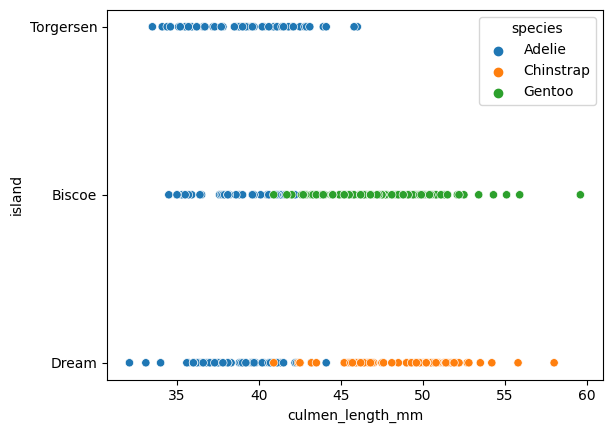

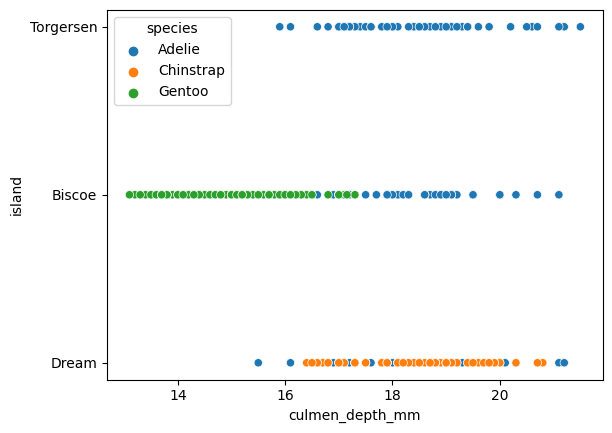

In [ ]:

sns.scatterplot(x=df['body_mass_g'],y=df['island'], hue=df['species'])
plt.show();
plt.figure()
sns.scatterplot(x=df['culmen_length_mm'],y=df['island'], hue=df['species'])
plt.show();
plt.figure()
sns.scatterplot(x=df['culmen_depth_mm'],y=df['island'], hue=df['species'])
plt.show();

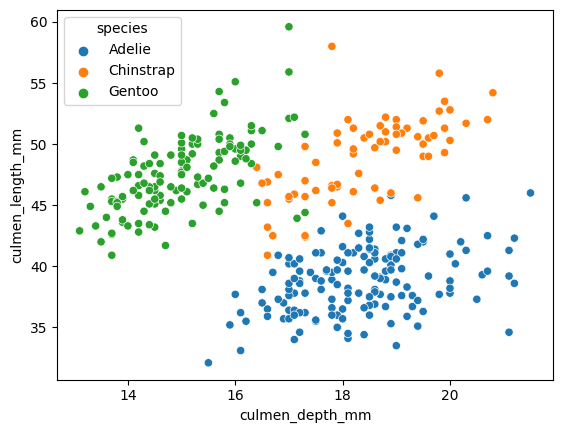

In [ ]:
sns.scatterplot(x=df['culmen_depth_mm'],y=df['culmen_length_mm'], hue=df['species'])
plt.show();

> Les visualisations faites, il est temps de passer à la modélisation. Séparons le jeu de données en features / target. Assurons-nous d'avoir le bon format de données en entrée de nos futurs modèles.
>
>
* (h) Exécuter la cellule suivante.

In [ ]:
df = df.query("sex != '.'")

In [ ]:
data = df.drop('species', axis = 1)
target = df['species']

data.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [ ]:
df.sex.value_counts()

MALE      178
FEMALE    165
Name: sex, dtype: int64

In [ ]:
# On encode les variables catégoriques restantes.
data = pd.get_dummies(data)

In [ ]:
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,0,0,1,0,1
1,39.50000,17.40000,186.000000,3800.000000,0,0,1,1,0
2,40.30000,18.00000,195.000000,3250.000000,0,0,1,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,0,1,0,1
4,36.70000,19.30000,193.000000,3450.000000,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,1,0,0,0,1
340,46.80000,14.30000,215.000000,4850.000000,1,0,0,1,0
341,50.40000,15.70000,222.000000,5750.000000,1,0,0,0,1
342,45.20000,14.80000,212.000000,5200.000000,1,0,0,1,0


In [ ]:
data.head()

> Pour entrainer et valider les performances de notre modèle, nous allons séparer le jeu de données en jeu d'entrainement et jeu de test.
>
>
* (i) Exécuter la cellule suivante.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)

> On peut également ajouter une étape de preprocessing à notre modélisation, pour notamment normaliser les données.
>
>
* Choisir un scaler au choix et normaliser les données d'entraînement et de test.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# 

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)


### **Modélisation**
> Il est temps de passer à la modélisation !  

In [ ]:
### Regression logistique 

LogReg = LogisticRegression()

# Entrainement 
LogReg.fit(X_train_norm, y_train)

# Prédiction 
y_pred = LogReg.predict(X_test_norm)

pd.crosstab(y_pred, y_test)


species,Adelie,Chinstrap,Gentoo
row_0,,,
Adelie,34,0,0
Chinstrap,0,9,0
Gentoo,0,0,26


In [ ]:
LogReg.score(X_test_norm,y_test)

1.0

In [ ]:
KNN = KNeighborsClassifier()

KNN.fit(X_train_norm, y_train)

y_pred_knn = KNN.predict(X_test_norm)

pd.crosstab(y_pred_knn, y_test)

species,Adelie,Chinstrap,Gentoo
row_0,,,
Adelie,34,0,0
Chinstrap,0,9,0
Gentoo,0,0,26


In [ ]:
KNN.score(X_test_norm,y_test)

1.0

### 

In [ ]:
pd.crosstab(df.species, df.island)